In [1]:
import mphot

In [2]:
instrument_efficiency_path = "../resources/systems/speculoos_Andor_iKon-L-936_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = (
    "../resources/filters/I+z.csv"  # index in microns, filter efficiency as fraction
)

name1, system_response1 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

instrument_efficiency_path = "../resources/systems/speculoos_PIRT_1280SciCam_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = (
    "../resources/filters/zYJ.csv"  # index in microns, filter efficiency as fraction
)

name2, system_response2 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

INFO:mphot.core:`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!
INFO:mphot.core:`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_PIRT_1280SciCam_-60_zYJ_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

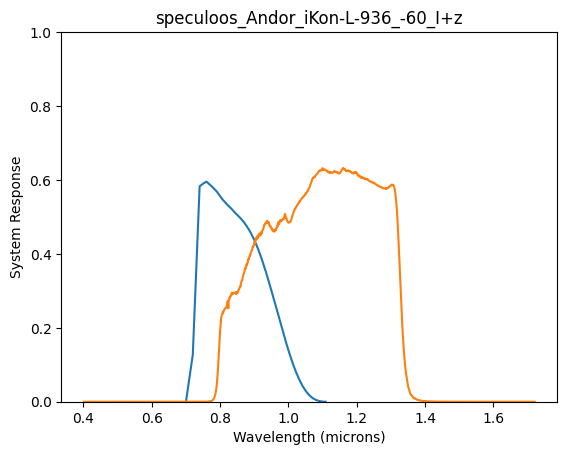

In [3]:
system_response1.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)
system_response2.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)

In [4]:
# sky properties
props_sky = {
    "pwv": 2.5,  # PWV [mm]
    "airmass": 1.1,  # airmass
    "seeing": 1.35,  # seeing (==FWHM) ["]
}

# instrument properties
props_instrument1 = {
    "name": name1,  # name to get SR/precision grid from file
    "plate_scale": 0.35,  # pixel plate scale ["]
    "N_dc": 0.2,  # dark current [e/pix/s]
    "N_rn": 6.328,  # read noise [e_rms/pix]
    "well_depth": 64000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 10.5,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# instrument properties
props_instrument2 = {
    "name": name2,  # name to get SR/precision grid from file
    "plate_scale": 0.31,  # pixel plate scale ["]
    "N_dc": 110,  # dark current [e/pix/s]
    "N_rn": 90,  # read noise [e_rms/pix]
    "well_depth": 56000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 0.1,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 2566  # [K]
distance = 12.5  # [pc]

In [5]:
# get the precision and components used to calculate it (generates grid if not already present)
result1 = mphot.get_precision(props_instrument1, props_sky, Teff, distance)
result2 = mphot.get_precision(props_instrument2, props_sky, Teff, distance)

mphot.display_results(result1, result2)

single frame [ppt]  \
              speculoos_Andor_iKon-L-936_-60_I+z   
All                                         1.48   
Star                                        1.14   
Scintillation                              0.620   
Sky                                        0.681   
Dark current                              0.0809   
Read noise                                 0.169   

                                                 \
              speculoos_PIRT_1280SciCam_-60_zYJ   
All                                        3.28   
Star                                       1.10   
Scintillation                              1.36   
Sky                                       0.722   
Dark current                              0.910   
Read noise                                 2.53   

                          10 minute binned [ppt]  \
              speculoos_Andor_iKon-L-936_-60_I+z   
All                                        0.453   
Star                                       0.350   
Scintillation                              0.190   
Sky                                        0.209   
Dark current                              0.0248   
Read noise                                0.0518   

                                                 
              speculoos_PIRT_1280SciCam_-60_zYJ  
All                                       0.417  
Star                                      0.140  
Scintillation                             0.172  
Sky                                      0.0917  
Dark current                              0.116  
Read noise                                0.321

,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_PIRT_1280SciCam_-60_zYJ
Teff [K],2.57e+3,2.57e+3
distance [pc],12.5,12.5
N_star [e/s],1.68e+4,8.63e+4
star_flux [e/m2/s],2.32e+4,1.19e+5
scn [e_rms],476,1.12e+3
pixels in aperture [pix],421,536
ap_radius [pix],11.6,13.1
N_sky [e/pix/s],14.2,69.2
sky_radiance [e/m2/arcsec2/s],160,995
seeing [arcsec],1.35,1.35


,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_PIRT_1280SciCam_-60_zYJ
star [mag],13.3,11.9
sky [mag/arcsec2],18.7,17.1
vega_flux [e/s],3.62e+9,4.94e+9
